Data Analysis on master dataset (suicide data analysis) 

In [66]:
#importing modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.plotting.register_matplotlib_converters()
%matplotlib inline

In [67]:
#loading data
suicideDataRaw= pd.read_csv('C:/Users/DELL/master.csv')
suicideData=suicideDataRaw.copy()

In [6]:
suicideData.shape

(27820, 12)

In [ ]:
suicideData.size

In [ ]:
suicideData.head()

In [ ]:
suicideData.columns

In [14]:
suicideData.rename(columns={'suicides_no':'suicides_number',
                            'suicides/100k pop':'suicides_per_100k_pop'}, inplace=True)
suicideData.rename(columns={' gdp_for_year ($) ':'gdp_for_year', 
                                        'gdp_per_capita ($)':'gdp_per_capita'},inplace=True)
suicideData.columns=suicideData.columns.str.replace(" ","_")
suicideData.columns=suicideData.columns.str.lower()
suicideData.columns

Index(['country', 'year', 'sex', 'age', 'suicides_number', 'population',
       'suicides_per_100k_pop', 'country-year', 'gdp_for_year',
       'gdp_per_capita', 'generation'],
      dtype='object')

In [ ]:
suicideData.head()

In [ ]:
suicideData.drop("country-year", axis = 1, inplace = True)

In [ ]:
suicideData.sample(5)

In [8]:
#basic statistical details
suicideData.describe().T

,count,mean,std,min,25%,50%,75%,max
year,27820.0,2.001258e+03,8.469055e+00,1985.000,1995.000,2002.000,2008.000,2.016000e+03
suicides_no,27820.0,2.425744e+02,9.020479e+02,0.000,3.000,25.000,131.000,2.233800e+04
population,27820.0,1.844794e+06,3.911779e+06,278.000,97498.500,430150.000,1486143.250,4.380521e+07
suicides/100k pop,27820.0,1.281610e+01,1.896151e+01,0.000,0.920,5.990,16.620,2.249700e+02
HDI for year,8364.0,7.766011e-01,9.336671e-02,0.483,0.713,0.779,0.855,9.440000e-01
gdp_per_capita ($),27820.0,1.686646e+04,1.888758e+04,251.000,3447.000,9372.000,24874.000,1.263520e+05


In [9]:
suicideData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
country               27820 non-null object
year                  27820 non-null int64
sex                   27820 non-null object
age                   27820 non-null object
suicides_no           27820 non-null int64
population            27820 non-null int64
suicides/100k pop     27820 non-null float64
country-year          27820 non-null object
HDI for year          8364 non-null float64
 gdp_for_year ($)     27820 non-null object
gdp_per_capita ($)    27820 non-null int64
generation            27820 non-null object
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [10]:
#missing value
suicideData.isnull().sum()

country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64

In [13]:
#drop hdi_for_year
suicideData.drop("HDI for year", axis = 1, inplace = True)

In [15]:
suicideData.gdp_for_year = suicideData.gdp_for_year.apply(lambda x: float(''.join(x.split(','))))
suicideData.age = suicideData.age.apply(lambda x: x.replace("years", ""))

In [16]:
suicideData.isnull().sum().sum()


0

In [17]:
suicideData.sample(5)


,country,year,sex,age,suicides_number,population,suicides_per_100k_pop,country-year,gdp_for_year,gdp_per_capita,generation
25392,Trinidad and Tobago,1991,female,55-74,2,58000,3.45,Trinidad and Tobago1991,5.307906e+09,4817,Silent
25857,Turkmenistan,1998,male,75+,2,15500,12.90,Turkmenistan1998,2.605688e+09,636,G.I. Generation
3003,Barbados,1994,female,15-24,0,22500,0.00,Barbados1994,2.151295e+09,8953,Generation X
1066,Armenia,1998,female,15-24,0,322300,0.00,Armenia1998,1.893726e+09,532,Generation X
23557,Spain,1987,female,55-74,320,3808600,8.40,Spain1987,3.178822e+11,8727,G.I. Generation


1. Do men or women commit more suicide?

In [18]:
#avg no of suicides by gender
suicideData.groupby("sex")["suicides_number"].mean()

sex
female    112.114306
male      373.034508
Name: suicides_number, dtype: float64

In [20]:
#avg rate of suicides by gender
suicideData.groupby("sex")["suicides_per_100k_pop"].mean()

sex
female     5.392866
male      20.239329
Name: suicides_per_100k_pop, dtype: float64

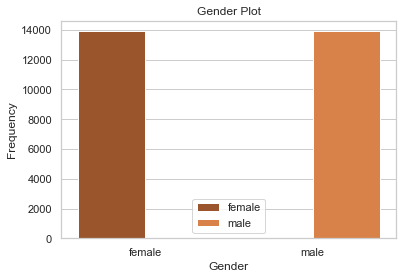

In [61]:
#bar plot
sns.set(style='whitegrid')
ax=sns.barplot(x=suicideData['sex'].value_counts().index,
               y=suicideData['sex'].value_counts().values,
               palette="Oranges_d",
               hue=['female','male'])
plt.legend(loc=8)
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.title('Gender Plot')
plt.show()

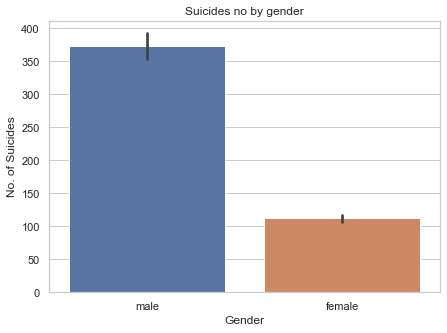

In [58]:
plt.figure(figsize=(7,5))
sns.barplot(x="sex",
           y="suicides_number",
           data=suicideData)
plt.xlabel('Gender')
plt.ylabel('No. of Suicides')
plt.title('Suicides no by gender')
plt.show()

2. Vizualize rankings of country acccording to no of suicides

In [32]:
#avg no of suicides by country in descending order 
suicideData.groupby("country",as_index=False)["suicides_number"].mean().sort_values(by="suicides_number",ascending=False).head()

,country,suicides_number
75,Russian Federation,3733.771605
98,United States,2779.604839
46,Japan,2169.091398
95,Ukraine,952.232143
35,Germany,933.532051


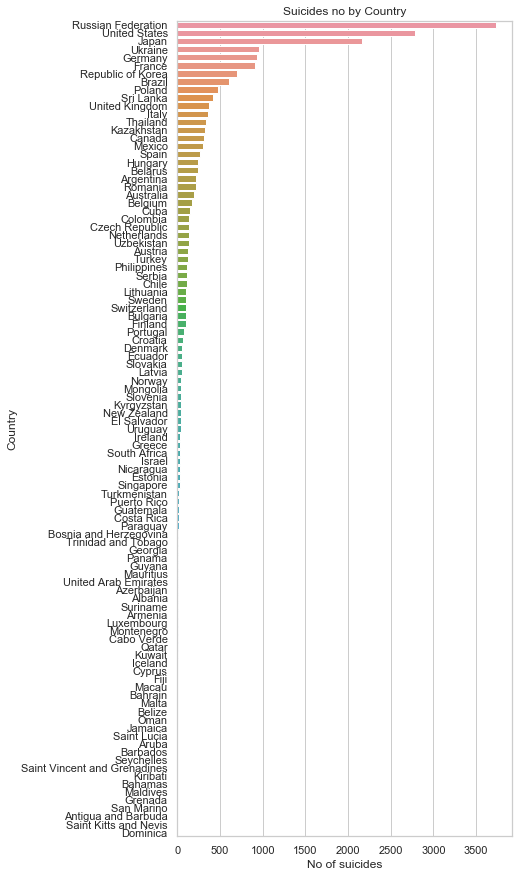

In [37]:
countrySN=suicideData.groupby("country",as_index=False)["suicides_number"].mean().sort_values(by="suicides_number",ascending=False)
plt.figure(figsize=(6,15))
sns.barplot(x="suicides_number",
           y="country",
           data=countrySN)
plt.ylabel('Country')
plt.xlabel('No of suicides')
plt.title('Suicides no by Country')
plt.show()

3. Which year has heighest number of sucide.


In [38]:
#avg no of suicides by year
suicideData.groupby("year",as_index=False)['suicides_number'].mean().sort_values(by='suicides_number',ascending=False)

,year,suicides_number
9,1994,284.390931
8,1993,284.057692
30,2015,273.709677
7,1992,271.119231
11,1996,267.018398
13,1998,263.281646
12,1997,260.546537
10,1995,260.196581
6,1991,257.838542
14,1999,257.147590


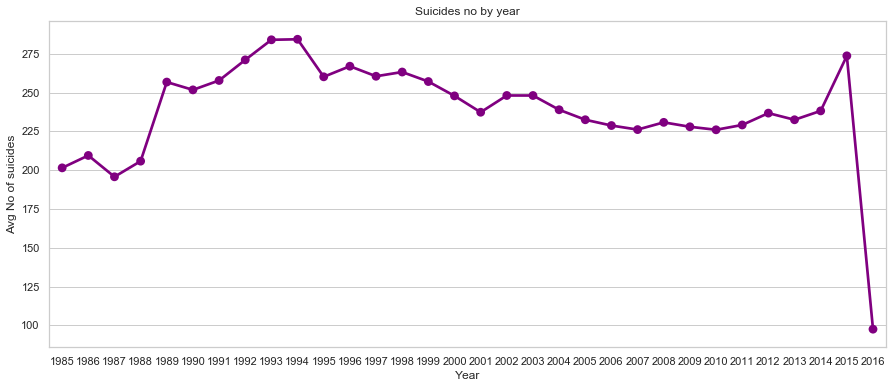

In [62]:
yearMeanSN=suicideData.groupby("year",as_index=False)["suicides_number"].mean()
plt.figure(figsize=(15,6))
sns.pointplot(x="year",
           y="suicides_number",
           data=yearMeanSN,color='purple')
plt.xlabel('Year')
plt.ylabel('Avg No of suicides')
plt.title('Suicides no by year')
plt.show()

4. Which Age group has heighest number of suicides rate.

In [52]:
#avg no of suicides by age
suicideData.groupby("age",as_index=False)['suicides_number'].mean().sort_values(by="suicides_number",ascending=False)

,age,suicides_number
2,35-54,528.250969
4,55-74,357.269065
1,25-34,242.118053
0,15-24,174.179664
5,75+,140.697544
3,5-14,11.337093


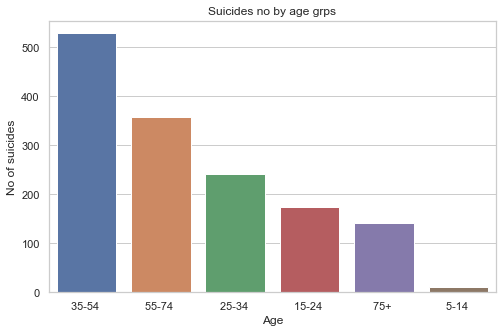

In [48]:
ageSN=suicideData.groupby("age",as_index=False)["suicides_number"].mean().sort_values(by="suicides_number",ascending=False)
plt.figure(figsize=(8,5))
sns.barplot(x="age",
           y="suicides_number",
           data=ageSN)
plt.xlabel('Age')
plt.ylabel('No of suicides')
plt.title('Suicides no by age grps')
plt.show()

5. Which genration has heighest number of suicde rate?

In [49]:
suicideData['generation'].value_counts()

Generation X       6408
Silent             6364
Millenials         5844
Boomers            4990
G.I. Generation    2744
Generation Z       1470
Name: generation, dtype: int64

In [51]:
suicideData.groupby("generation",as_index=False)['suicides_number'].mean().sort_values(by="suicides_number",ascending=False)

,generation,suicides_number
0,Boomers,457.815230
5,Silent,279.972344
2,Generation X,239.201623
1,G.I. Generation,185.863338
4,Millenials,106.683607
3,Generation Z,10.820408


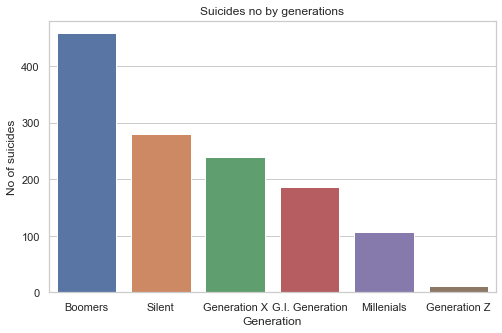

In [53]:
generationSN=suicideData.groupby("generation",as_index=False)["suicides_number"].mean().sort_values(by="suicides_number",ascending=False)
plt.figure(figsize=(8,5))
sns.barplot(x="generation",
           y="suicides_number",
           data=generationSN)
plt.xlabel('Generation')
plt.ylabel('No of suicides')
plt.title('Suicides no by generations')
plt.show()

In [68]:
suicide_data1 = suicideData.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11]]
suicide_corr = suicide_data1.corr()

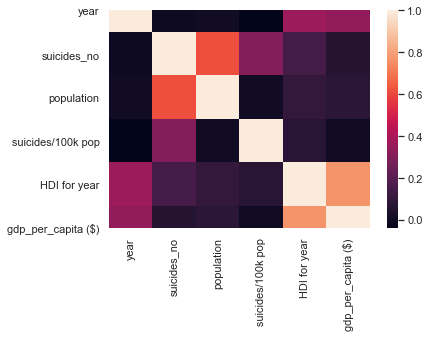

In [69]:
sns.heatmap(suicide_corr, square = True)